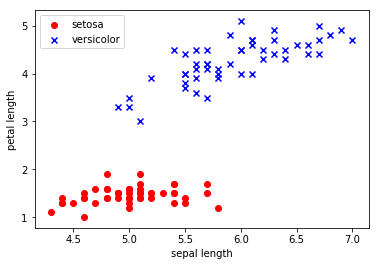

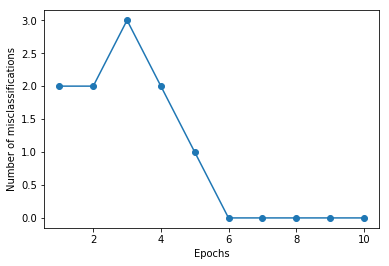

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    ----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset
    
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, Y):
        """Fit training data
        
        Parameters
        ----------
        X {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and n_features is the number of features.
        Y : array-like, shape = [n_samples]
            Target values.
        
        Returns
        -------
        self: object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for iteration in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, Y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)



names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = read_csv('iris.csv', names=names)
Y = df.iloc[0:100, 4].values
Y = np.where(Y == 'setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()


ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, Y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()